Preparing a 2 qubit bell state 

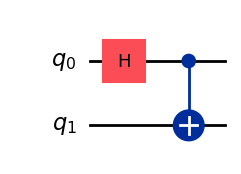

In [ ]:
from qiskit import QuantumCircuit

#creating entanglement
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw(output='mpl')

In [2]:
from qiskit.quantum_info import Pauli

#Pauli Operators
ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

observables = [ZZ,ZI,IZ,XX,XI,IX]


Note: The expectation value tells you the average result if you were to measure the quantum state many times using that observable.

In [ ]:
from qiskit_aer.primitives import Estimator

#computing the expectation values
estimator  = Estimator()
job = estimator.run([qc]*len(observables),observables)
job.result()


EstimatorResult(values=array([ 1.        ,  0.01171875,  0.01171875,  1.        , -0.0390625 ,
       -0.0390625 ]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0169422, 'sample_measure_time': 0.0032739, 'input_qubit_map': [[0, 0], [1, 1]], 'max_memory_mb': 3819, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 2, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.9998626708984375, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0169422, 'sample_measure_time': 0.003273

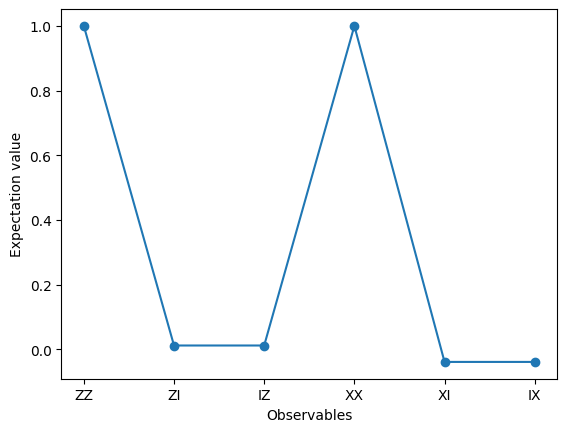

In [4]:
import matplotlib.pyplot as plt

data = ['ZZ','ZI','IZ','XX','XI','IX']
values = job.result().values

plt.plot(data,values,'-o')
plt.xlabel('Observables')
plt.ylabel('Expectation value')
plt.show()